# 18 资产收益率和风险
## 18.1 单期和多期简单收益率
### 18.1.1 单期简单收益率
- 单期简单收益率
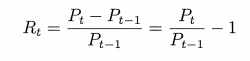
- 简单毛收益率
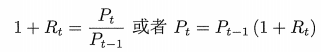
### 18.1.2 多期简单收益率
- 2期简单收益率
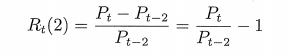
- k期简单收益率
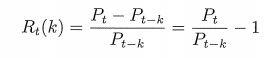

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
stock = pd.read_csv('./018/stockszA.csv', index_col='Trddt')
stock.head()

,Stkcd,Opnprc,Hiprc,Loprc,Clsprc,Dnshrtrd,Dnvaltrd,Dsmvosd,Dsmvtll,Dretwd,Dretnd,Adjprcwd,Adjprcnd,Markettype,Capchgdt,Trdsta
Trddt,,,,,,,,,,,,,,,,
2014/1/2,1,12.12,12.30,12.05,12.23,48991089,596223744.4,68193279.93,1.002537e+08,-0.001633,-0.001633,686.893127,586.277691,4,2013/11/12,1
2014/1/3,1,12.15,12.16,11.78,11.93,55111484,656631302.4,66520509.37,9.779451e+07,-0.024530,-0.024530,670.043745,571.896390,4,2013/11/12,1
2014/1/6,1,11.89,12.00,11.50,11.67,58211823,679280389.7,65070774.88,9.566320e+07,-0.021794,-0.021794,655.440948,559.432596,4,2013/11/12,1
2014/1/7,1,11.53,11.76,11.51,11.63,33840749,393977581.0,64847738.81,9.533530e+07,-0.003428,-0.003428,653.194364,557.515089,4,2013/11/12,1
2014/1/8,1,11.64,11.95,11.53,11.76,45776816,538436179.5,65572606.05,1.119640e+08,0.011178,0.011178,660.495763,563.746986,4,2014/1/8,1


In [2]:
# 万科股票数据
vanke = stock[stock.Stkcd == 2]

# 收盘价
close = vanke.Clsprc
close.index = pd.to_datetime(close.index)
close.head()

Trddt
2014-01-02    7.99
2014-01-03    7.84
2014-01-06    7.48
2014-01-07    7.43
2014-01-08    7.42
Name: Clsprc, dtype: float64

In [3]:
# 收盘及滞后一天
lagclose = close.shift(1)
lagclose.head()

Trddt
2014-01-02     NaN
2014-01-03    7.99
2014-01-06    7.84
2014-01-07    7.48
2014-01-08    7.43
Name: Clsprc, dtype: float64

In [4]:
# 单期简单收益率
simpleret = (close - lagclose) / lagclose
simpleret.head()

Trddt
2014-01-02         NaN
2014-01-03   -0.018773
2014-01-06   -0.045918
2014-01-07   -0.006684
2014-01-08   -0.001346
Name: Clsprc, dtype: float64

In [5]:
# 合并数据
calret = pd.DataFrame({'close': close, 'lagclose': lagclose, 'simpleret': simpleret})
calret.head()

,close,lagclose,simpleret
Trddt,,,
2014-01-02,7.99,NaN,NaN
2014-01-03,7.84,7.99,-0.018773
2014-01-06,7.48,7.84,-0.045918
2014-01-07,7.43,7.48,-0.006684
2014-01-08,7.42,7.43,-0.001346


In [6]:
# 2期简单收益率
simpleret2 = (close - close.shift(2)) /  close.shift(2)
simpleret2.head()

Trddt
2014-01-02         NaN
2014-01-03         NaN
2014-01-06   -0.063830
2014-01-07   -0.052296
2014-01-08   -0.008021
Name: Clsprc, dtype: float64

In [7]:
calret['simpleret2'] = simpleret2
calret.head()

,close,lagclose,simpleret,simpleret2
Trddt,,,,
2014-01-02,7.99,NaN,NaN,NaN
2014-01-03,7.84,7.99,-0.018773,NaN
2014-01-06,7.48,7.84,-0.045918,-0.063830
2014-01-07,7.43,7.48,-0.006684,-0.052296
2014-01-08,7.42,7.43,-0.001346,-0.008021


### 18.1.3 Python 函数计算简单收益率

In [8]:
import ffn
ffnSimpleret = ffn.to_returns(close)
ffnSimpleret.head()

Trddt
2014-01-02         NaN
2014-01-03   -0.018773
2014-01-06   -0.045918
2014-01-07   -0.006684
2014-01-08   -0.001346
Name: Clsprc, dtype: float64

### 18.1.4 单期与多期简单收益率的关系
- 两期收益率
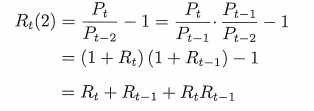
- 复利
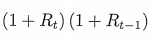
- k期收益率
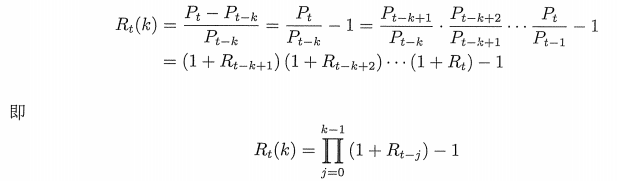
- 算术平均收益率
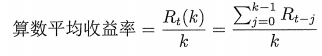
- 几何平均收益率
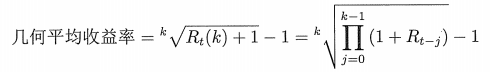

### 18.1.5 年华收益率
- 年化收益率的计算与复利相关，假设持有资产时间为 T 期，获取到收益率为 RT，一年共 m 个单期，则年华收益率为：
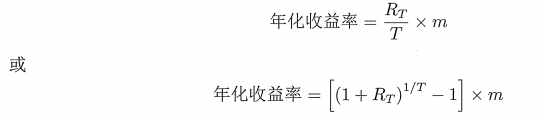
- 也可以用下面公式计算，将 T 时段获取的收益复利 m/T次
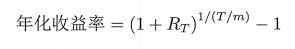
- RT 不是直接给出，由 T 期的单期收益率计算
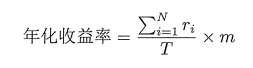
- RT 用复利的计算方式
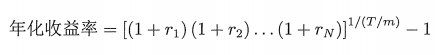

In [9]:
# python 计算年华简单收益率
# 假设一年 245个交易日
annualize = (1 + simpleret).cumprod()[-1] ** (245/len(simpleret)) - 1
annualize

0.5660614874349641

In [10]:
def fun_annualize(returns, period):
    if period == 'day':
        return (1 + returns).cumprod()[-1] ** (245/len(returns)) - 1
    elif period == 'month':
        return (1+returns).cumprod()[-1]**(12/len(returns)) - 1
    elif period == 'quarter':
        return (1+returns).cumprod()[-1] ** (4/len(returns)) - 1
    elif period == 'year':
        return (1+returns).cumprod()[-1] ** (1/len(returns)) - 1
    else:
        raise Exception('Wrong period')

In [11]:
fun_annualize(simpleret, 'day')

0.5660614874349641

### 18.1.6 考虑股利分红的简单收益率
- 除息价
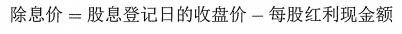
- 除权价
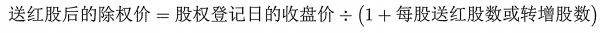
- 除权除息价
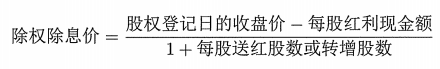
- t 期单期收益率
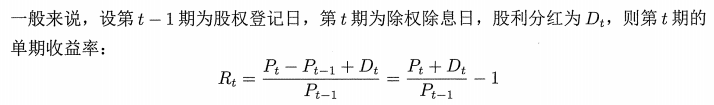
- 股息率 股息和股价的比率
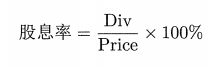
- 市盈率/本益比
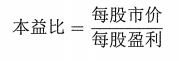

## 18.2 连续复利收益率
- 连续复利： 投资期数趋于无穷大，不同期之间的时间间隔无穷小，分分秒秒都在复利。单期简单收益率为 R，有 n 个复利结算周期，T 期收益率：
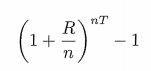
- T 期连续复利的收益率：
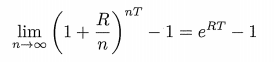
- 收益率
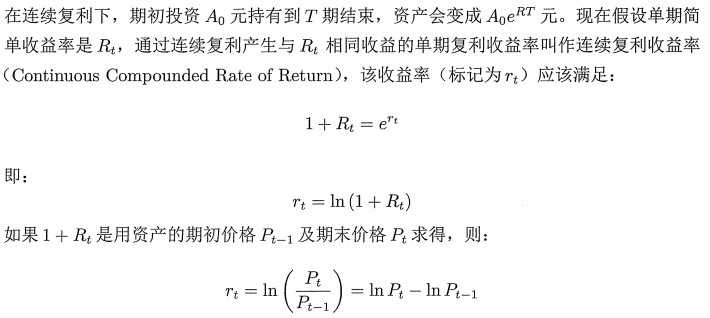

In [12]:
import numpy as np
comporet = np.log(close / lagclose)
comporet.head()

Trddt
2014-01-02         NaN
2014-01-03   -0.018952
2014-01-06   -0.047006
2014-01-07   -0.006707
2014-01-08   -0.001347
Name: Clsprc, dtype: float64

In [13]:
# 使用 ffn 包中的函数
ffnComporet = ffn.to_log_returns(close)
ffnComporet.head()

Trddt
2014-01-02         NaN
2014-01-03   -0.018952
2014-01-06   -0.047006
2014-01-07   -0.006707
2014-01-08   -0.001347
Name: Clsprc, dtype: float64

### 18.2.1 多期连续复利收益率
- k 期连续复利收益率：
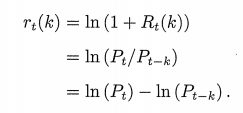

In [14]:
comporet2 = np.log(close / close.shift(2))
comporet2.head()

Trddt
2014-01-02         NaN
2014-01-03         NaN
2014-01-06   -0.065958
2014-01-07   -0.053713
2014-01-08   -0.008054
Name: Clsprc, dtype: float64

### 18.2.3 单期与多期连续复利收益率的关系
- 2 期连续复利收益率
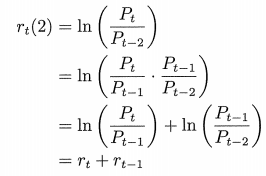
- k 期连续复利收益率 : 单期加总即为多期
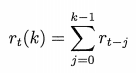

In [15]:
comporet = comporet.dropna()
comporet + comporet.shift(1)

Trddt
2014-01-03         NaN
2014-01-06   -0.065958
2014-01-07   -0.053713
2014-01-08   -0.008054
2014-01-09    0.004030
                ...   
2015-04-08    0.027138
2015-04-09    0.064903
2015-04-10    0.035540
2015-04-13   -0.018615
2015-04-14   -0.014065
Name: Clsprc, Length: 310, dtype: float64

## 18.3 绘制收益图

<AxesSubplot:xlabel='Trddt'>

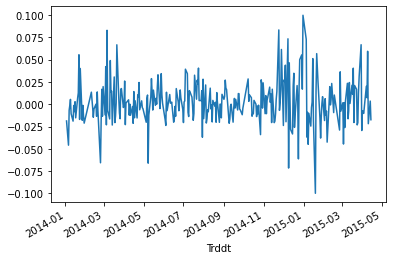

In [16]:
%matplotlib inline
simpleret.plot()

<AxesSubplot:xlabel='Trddt'>

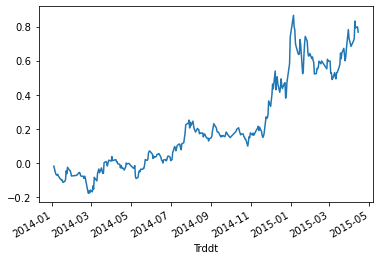

In [17]:
%matplotlib inline
((1+simpleret).cumprod() - 1).plot()

## 18.4 资产风险的来源
### 18.4.1 市场风险
### 18.4.2 利率风险
### 18.4.3 汇率风险
### 18.4.4 流动性风险
### 18.4.5 信用风险
### 18.4.6 通货膨胀风险
### 18.4.7 营运风险

## 18.5 资产风险的测度
- 单个资产的风险：
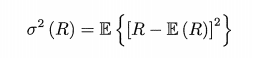
- 收益率 R 是离散分布
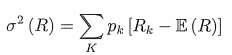
- R 服从连续分布
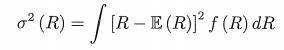

In [18]:
SAPower = pd.read_csv('./018/SAPower.csv', index_col='Date')
SAPower.index = pd.to_datetime(SAPower.index)
SAPower.head()

,Unnamed: 0,Open,High,Low,Close,Volume
Date,,,,,,
2014-01-01,1,14.24,14.24,14.24,14.24,0
2014-01-02,2,14.23,14.57,14.15,14.55,7093500
2014-01-03,3,14.43,14.50,14.09,14.24,6885700
2014-01-06,4,14.14,14.14,13.50,13.68,5462500
2014-01-07,5,13.68,14.14,13.39,13.91,4491900


In [19]:
DalianRP = pd.read_csv('./018/DalianRP.csv', index_col='Date', parse_dates=['Date'])
DalianRP.head()

,Unnamed: 0,Open,High,Low,Close,Volume
Date,,,,,,
2014-01-01,1,15.502,15.502,15.502,15.502,0
2014-01-02,2,15.732,15.870,15.203,15.640,2946700
2014-01-03,3,15.548,16.399,15.410,16.169,6475400
2014-01-06,4,16.192,16.261,15.111,15.180,4401100
2014-01-07,5,14.973,15.387,14.674,14.927,2718000


In [20]:
returnS = ffn.to_returns(SAPower.Close)
returnD = ffn.to_returns(DalianRP.Close)

In [21]:
returnS.std()

0.041511404614033375

In [22]:
returnD.std()

0.020319411733180383

### 18.5.2 下行风险
- 目标收益率：可接受的最低收益率 (MARR)代表
- 下行偏差描述的是低于 MARR 的收益率的发散程度
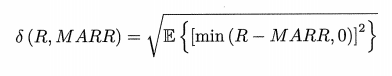
- R1，R2，... RT 为R的随机样本，样本的下行偏差：
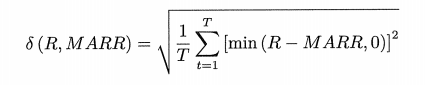

In [23]:
def cal_half_risk(returns):
    mu = returns.mean()
    temp = returns[returns < mu]
    return (sum((mu - temp) ** 2) / len(returns)) ** 0.5

cal_half_risk(returnS)

0.03552493855977126

In [24]:
cal_half_risk(returnD)

0.013673338707193382


### 18.5.3 风险价值
- 风险价值 VaR 是给定的置信水平的目标时段下预期的最大损失，或最坏情况下的损失。换句话说，在市场正常波动的条件下，在一定概率水平α%下，某一金融资产或金融资产组合的VaR(α, Δt) 是在未来一段时间 Δt 内的最大可能损失：
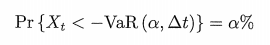
- 估算方法
    - 历史模拟法
    - 协方差矩阵法
    - 蒙特卡罗模拟法

In [25]:
# 历史模拟法
returnS.quantile(0.05)

-0.043192456894806296

In [26]:
returnD.quantile(0.05)

-0.03408596308105866

In [27]:
# 协方差矩阵法
from scipy.stats import norm
norm.ppf(0.05, returnS.mean(), returnS.std())

-0.06621086216022148

In [28]:
norm.ppf(0.05, returnD.mean(), returnD.std())

-0.03274944602236822

### 18.5.4 期望亏空
- 期望亏空是为了弥补 VaR 理论上的缺点。
- 期望亏空考虑的是超越 VaR 水平的损失的期望值，也就是最坏的α% 损失的平均值
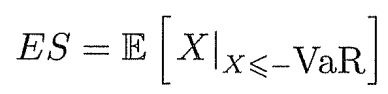

In [29]:
returnS[returnS <= returnS.quantile(0.05)].mean()

-0.09673316088802106

In [30]:
returnD[returnD <= returnD.quantile(0.05)].mean()

-0.04536728238570146

### 18.5.5 最大回撤
- 回撤：某资产在时刻 T 的回撤指资产在(0,T)的最高峰与现价值 PT 之间的回落值
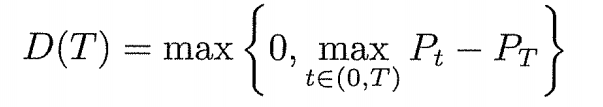
- 回撤率
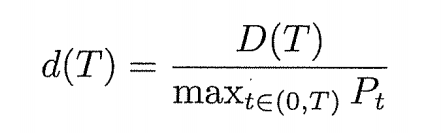
- 最大回撤：资产在 T 时刻的最大回撤 MDD(T) ，资产在时段(0,T)内回撤的最大值
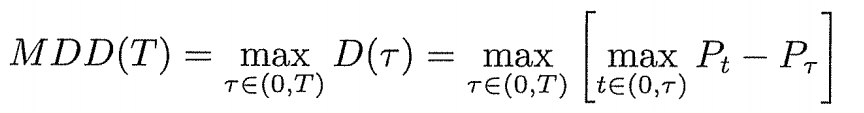
- 最大回撤率
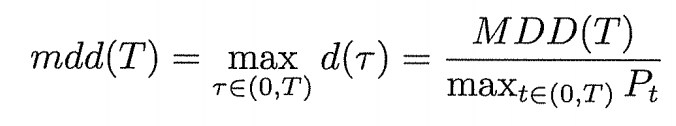

- 以收益率计算回撤L
    - 资产收益率序列为 R1,R2,...,RT，T时点的回撤值：
    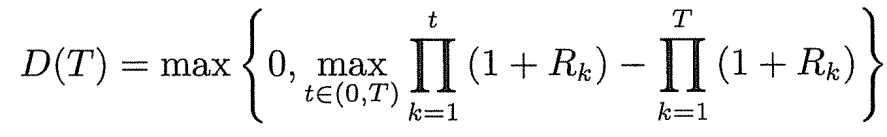
    - 回撤率：
    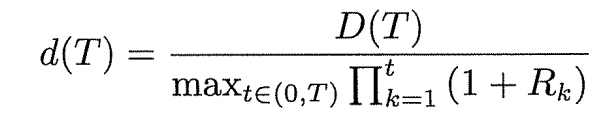
    - 最大回撤
    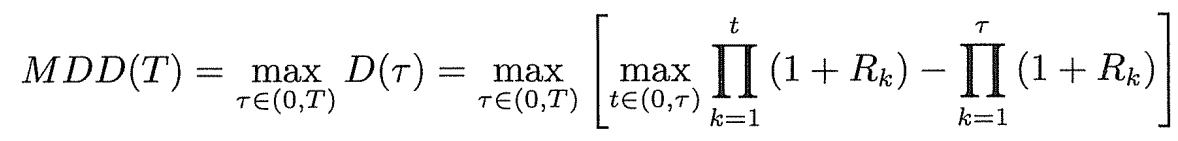
    - 最大回撤率
    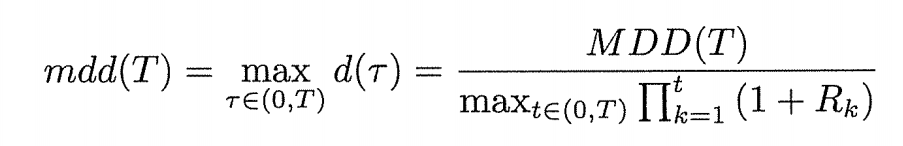

In [31]:
 import datetime

In [32]:
r = pd.Series([0, 0.1, -0.1, -0.01, 0.01, 0.02],
              index=[datetime.date(2015, 7, x) for x in range(3, 9)])
r

2015-07-03    0.00
2015-07-04    0.10
2015-07-05   -0.10
2015-07-06   -0.01
2015-07-07    0.01
2015-07-08    0.02
dtype: float64

In [33]:
value = (1 + r).cumprod()
value

2015-07-03    1.000000
2015-07-04    1.100000
2015-07-05    0.990000
2015-07-06    0.980100
2015-07-07    0.989901
2015-07-08    1.009699
dtype: float64

In [34]:
D = value.cummax() - value
D

2015-07-03    0.000000
2015-07-04    0.000000
2015-07-05    0.110000
2015-07-06    0.119900
2015-07-07    0.110099
2015-07-08    0.090301
dtype: float64

In [35]:
d = D / (D + value)
d

2015-07-03    0.000000
2015-07-04    0.000000
2015-07-05    0.100000
2015-07-06    0.109000
2015-07-07    0.100090
2015-07-08    0.082092
dtype: float64

In [36]:
MDD = D.max()
MDD

0.1199

In [37]:
mdd = d.max()
mdd

0.109

In [38]:
# ffn 中的 calc_max_drawdown()
ffn.calc_max_drawdown((1+returnS).cumprod())

-0.5676392572944298

In [39]:
ffn.calc_max_drawdown((1 + returnD).cumprod())

-0.24797570850202444

# 19 投资组合理论及其拓展
## 19.1 投资组合的收益率与风险
- 两种风险资产，资产 A 和资产 B 的随机收益率为 RA 和 RB，投资比例为 wA 和 wB，且 wA+wB=1。初期资本为 W0。
    - 投资组合收益率
    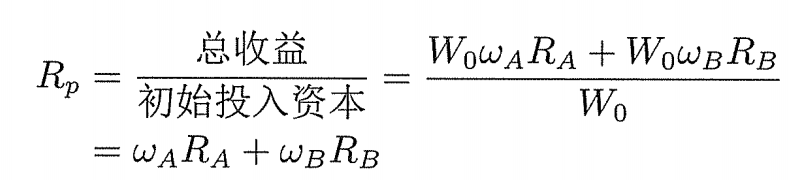
    - 投资组合方差（收益率的方差指代风险）
    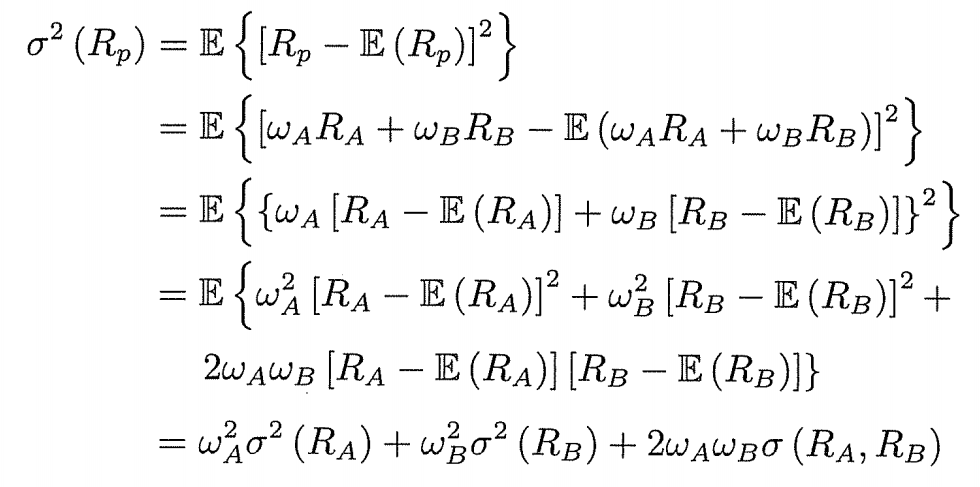
    - 标准差
    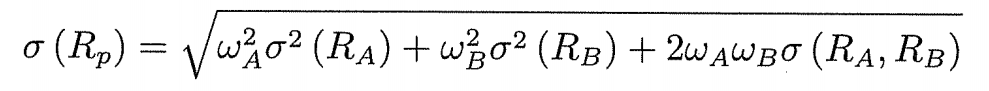
- N 中风险资产，资产收益率为 RA, RB, ..., RN，投资比重为 w1, w2,..., wN。初期资本为 W0
    - 投资组成收益率
    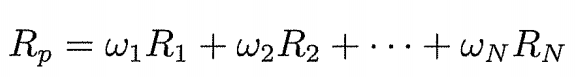
    - 投资组成期望收益率
    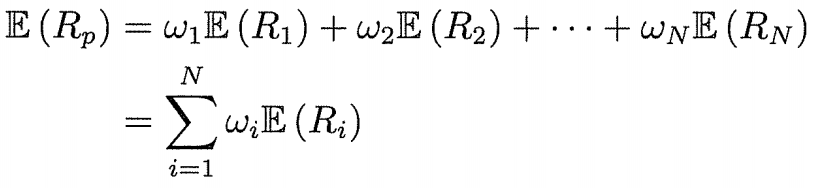
    - 方差
    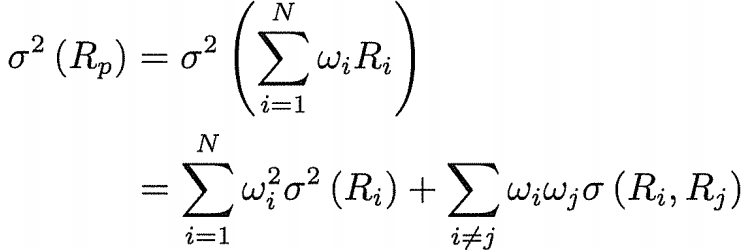

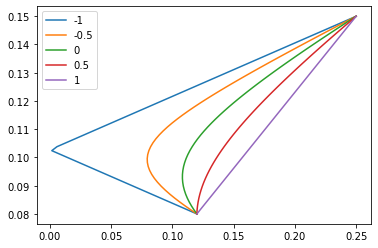

In [40]:
# python 绘制出不通相关系数下，投资组合标准差随投资比例遍地的情况
import numpy as np
import math
%matplotlib inline
# 组合收益率


def cal_mean(frac):
    return (0.08 * frac + 0.15 * (1 - frac))


# 不同投资比重下的组合收益率
mean = list(map(cal_mean, [x/50 for x in range(51)]))

# 标准差
sd_mat=np.array([list(map(lambda x: math.sqrt((x**2)*0.12**2+((1-x)**2)*0.25**2+2*x*(1-x)*(-1.5+i*0.5)*0.12*0.25),[x/50 for x in range(51)])) for i in range(1,6)])

plt.plot(sd_mat[0, :], mean, label = '-1')
plt.plot(sd_mat[1, :], mean, label = '-0.5')
plt.plot(sd_mat[2, :], mean, label = '0')
plt.plot(sd_mat[3, :], mean, label = '0.5')
plt.plot(sd_mat[4, :], mean, label = '1')
plt.legend(loc='upper left')
plt.show()

## 19.2 Markowitz 均值-方差模型
- 决策问题，投资人在投资初期要决定各个资产的投资比重，期待该行为能达到最大化的投资期望值。下式说明投资人资产分配的原则式在达成投资目标的前提下，要将资产组合的风险最小化，决策问题公式：
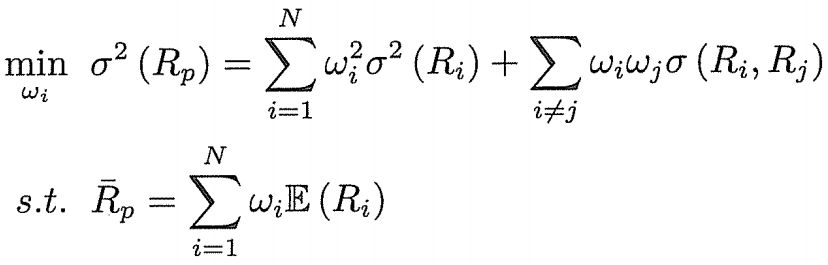
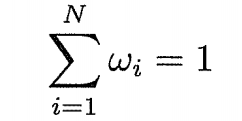
- 最终投资比重的最优解形式满足：
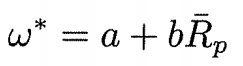
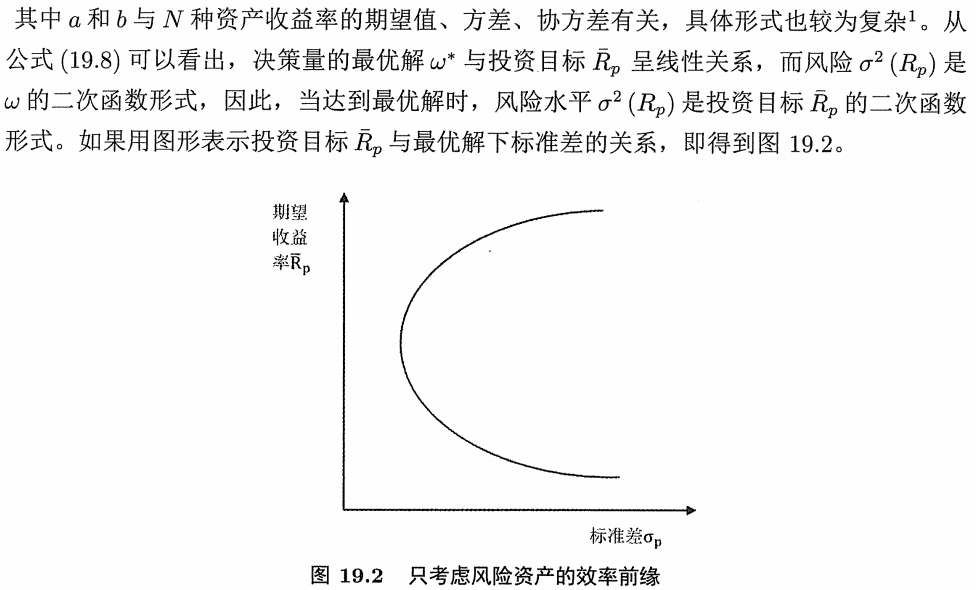
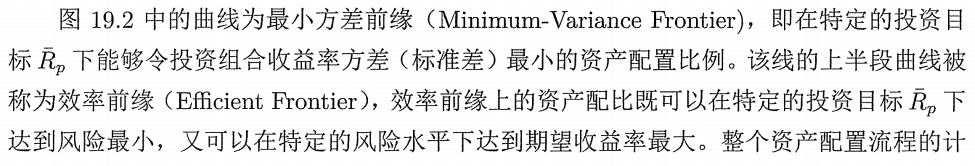
- 将无风险资产考虑进投资组合，决策问题公式为：
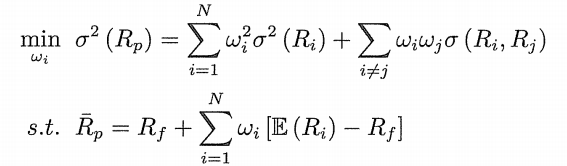
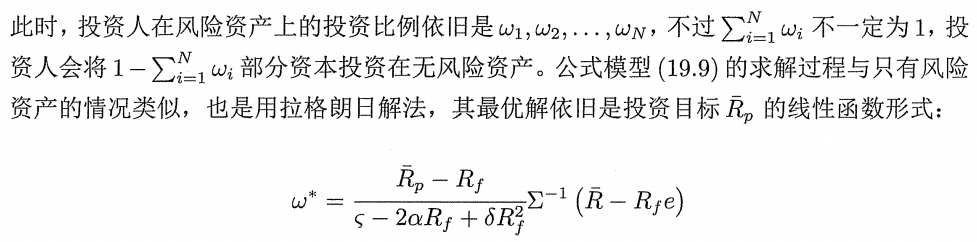
- 资本市场线
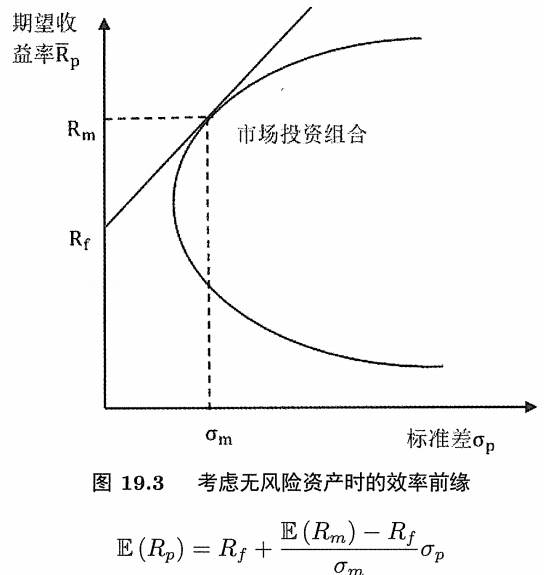

## 19.3 Markowitz 模型之 Python 实现

In [41]:
# 读取数据
stock = pd.read_csv('./019/stock.txt', sep='\t', index_col='Trddt')
fjgs = stock.loc[stock.Stkcd == 600033, 'Dretwd']
fjgs.name = 'fjgs'
zndl = stock.loc[stock.Stkcd == 600023, 'Dretwd']
zndl.name = 'zndl'
sykj = stock.loc[stock.Stkcd == 600183, 'Dretwd']
sykj.name = 'sykj'
hxyh = stock.loc[stock.Stkcd == 600015, 'Dretwd']
hxyh.name = 'hxyh'
byjc = stock.loc[stock.Stkcd == 600004, 'Dretwd']
byjc.name = 'byjc'

sh_return = pd.concat([byjc, hxyh, zndl, fjgs, sykj], axis=1)
sh_return.index = pd.to_datetime(sh_return.index)
sh_return.head()

,byjc,hxyh,zndl,fjgs,sykj
Trddt,,,,,
2014-01-02,-0.001439,-0.031505,0.008876,0.000000,0.002024
2014-01-03,-0.008646,-0.028916,-0.013196,0.004673,-0.012121
2014-01-06,-0.018895,-0.023573,0.005944,-0.023256,-0.026585
2014-01-07,-0.007407,-0.003812,-0.013294,0.004762,0.021008
2014-01-08,0.005970,0.021684,0.008982,-0.014218,-0.014403


Text(0.5, 1.0, 'Cumulative Return of 5 Stocks')

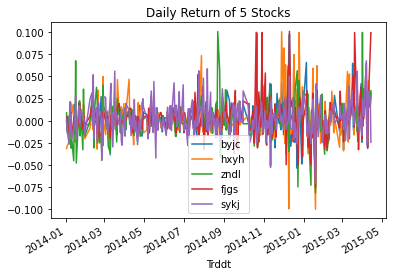

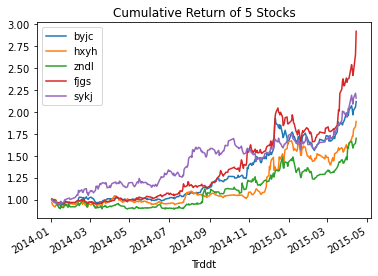

In [45]:
# 查看各股票得累积回报率
sh_return = sh_return.dropna()
cum_return = (1 + sh_return).cumprod()
sh_return.plot()
plt.title('Daily Return of 5 Stocks')

cum_return.plot()
plt.title('Cumulative Return of 5 Stocks')

In [46]:
# 查看各股票回报率相关性
sh_return.corr()

,byjc,hxyh,zndl,fjgs,sykj
byjc,1.000000,0.327680,0.429905,0.591674,0.372088
hxyh,0.327680,1.000000,0.369259,0.282111,0.207656
zndl,0.429905,0.369259,1.000000,0.397685,0.302859
fjgs,0.591674,0.282111,0.397685,1.000000,0.361442
sykj,0.372088,0.207656,0.302859,0.361442,1.000000


In [52]:
# 定义 MeanVariance 类
from scipy import linalg


class MeanVariance:
    # 构造器，传入收益率数据
    def __init__(self, returns):
        self.returns = returns

    # 最小化方差函数，即求解二次规划
    def minVar(self, goalRet):
        covs = np.array(self.returns.cov())
        means = np.array(self.returns.mean())
        L1 = np.append(np.append(covs.swapaxes(0, 1), [means], 0), [
                       np.ones(len(means))], 0).swapaxes(0, 1)
        L2 = list(np.ones(len(means)))
        L2.extend([0, 0])
        L3 = list(means)
        L3.extend([0, 0])
        L4 = np.array([L2, L3])
        L = np.append(L1, L4, 0)
        results = linalg.solve(L, np.append(
            np.zeros(len(means)), [1, goalRet], 0))
        return (np.array([list(self.returns.columns), results[:-2]]))

    # 绘制最小方差前缘曲线
    def frontierCurve(self):
        goals = [x/500000 for x in range(-100, 4000)]
        variances = list(map(lambda x: self.calVar(
            self.minVar(x)[1, :].astype(float)), goals))
        plt.plot(variances, goals)

    # 给定各资产的比例，计算收益率均值
    def meanRet(self, fracs):
        meanRisky = ffn.to_returns(self.returns).mean()
        assert len(meanRisky) == len(
            fracs), 'Length of fractions must be equal to number of assets'
        return (np.sum(np.multiply(meanRisky, np.array(fracs))))

    # 给定各资产的比例，计算收益率方差
    def calVar(self, fracs):
        return (np.dot(np.dot(fracs, self.returns.cov()), fracs))

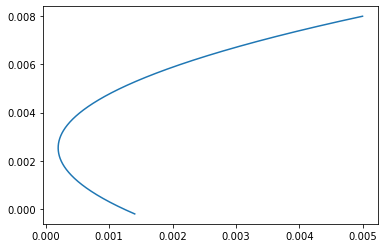

In [53]:
# 绘制最小方差前缘曲线
minVar = MeanVariance(sh_return)
minVar.frontierCurve()

In [55]:
# 选取训练集和测试集
train_set = sh_return.loc['2014']
test_set = sh_return.loc['2015']

In [56]:
# 选取组合
varMinimizer = MeanVariance(train_set)
goal_return = 0.003
portfolio_weight = varMinimizer.minVar(goal_return)
portfolio_weight

array([['byjc', 'hxyh', 'zndl', 'fjgs', 'sykj'],
       ['-0.10970733137287964', '0.34747305363072123',
        '-0.48011120265067814', '0.8121632841002365',
        '0.43018219629259996']], dtype='<U32')

In [69]:
# 计算测试集收益率
test_return = np.dot(test_set, np.array([portfolio_weight[1,:].astype(float)]).swapaxes(0, 1))
test_return = pd.DataFrame(test_return, index=test_set.index)
test_cum_return = (1 + test_return).cumprod()
test_cum_return

,0
Trddt,
2015-01-05,1.003351
2015-01-06,1.024797
2015-01-07,0.983947
2015-01-08,0.959082
2015-01-09,0.970924
...,...
2015-04-08,1.281047
2015-04-09,1.259315
2015-04-10,1.301957


In [70]:
# 与随机生成的组合进行比较
sim_weight = np.random.uniform(0, 1, (100, 5))
sim_weight = np.apply_along_axis(lambda x: x / sum(x), 1, sim_weight)
sim_return = np.dot(test_set, sim_weight.swapaxes(0, 1))
sim_return = pd.DataFrame(sim_return, index=test_cum_return.index)
sim_cum_return = (1 + sim_return).cumprod()
sim_cum_return

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
Trddt,,,,,,,,,,,,,,,,,,,,,
2015-01-05,1.022714,1.035355,1.023989,1.034993,1.026478,1.038200,1.037658,1.021884,1.026964,1.016476,...,1.018958,1.023113,1.018654,1.016844,1.019506,1.044458,1.023659,1.022806,1.031866,1.016165
2015-01-06,1.012101,1.030478,1.017870,1.037971,1.023944,1.037687,1.044672,1.018941,1.021655,1.004991,...,1.006047,1.015364,1.021694,1.005740,1.021125,1.039440,1.020108,1.025985,1.034422,1.011803
2015-01-07,1.014435,1.021579,1.004127,1.038106,1.022377,1.024210,1.040095,1.012158,1.017656,0.996888,...,1.007270,1.001832,1.008739,1.003179,1.006096,1.037009,1.007724,1.020438,1.019619,1.008156
2015-01-08,0.994100,1.004352,0.981790,1.013250,0.998323,1.003098,1.015180,0.983255,0.992848,0.973157,...,0.976835,0.979047,0.983693,0.983674,0.980782,1.011406,0.987919,0.998241,0.999084,0.978688
2015-01-09,0.986120,1.002896,0.986271,1.005521,0.992747,1.006186,1.009895,0.984422,0.991054,0.975290,...,0.976501,0.984236,0.984291,0.978575,0.983975,1.011311,0.988551,0.991611,1.000544,0.977483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-04-08,1.185352,1.223581,1.182748,1.227507,1.202533,1.219094,1.244111,1.166756,1.181614,1.151693,...,1.113620,1.171738,1.215199,1.183373,1.204002,1.178652,1.212606,1.239937,1.237914,1.158606
2015-04-09,1.159672,1.192585,1.161690,1.194301,1.175198,1.189624,1.209285,1.146928,1.157627,1.134888,...,1.098914,1.152248,1.191309,1.160610,1.181925,1.150390,1.187198,1.209425,1.207839,1.140324
2015-04-10,1.192087,1.226626,1.200816,1.223078,1.207275,1.225289,1.238549,1.183510,1.192307,1.174131,...,1.136070,1.192092,1.227349,1.195618,1.219660,1.183717,1.223795,1.240471,1.242928,1.176351


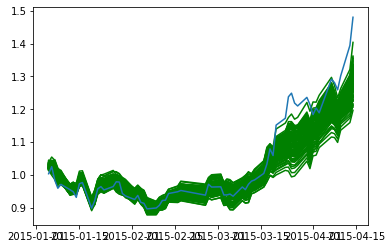

In [89]:
plt.plot(sim_cum_return.index,sim_cum_return.values,color='green')
plt.plot(test_cum_return.index, test_cum_return.values)

## 19.4 Black-Litterman 模型